# Datasets and DataLoaders

In [2]:
!nvidia-smi

Fri Aug  6 09:38:45 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
# Loading libraries
import torch
import numpy as np
import os
import pandas as pd

from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

In [23]:
# Loading datasets
training_data = datasets.CIFAR10(
    root = 'data', train=True, download=False, transform=ToTensor()
)
test_data = datasets.CIFAR10(
    root='data', train=False, download=False, transform=ToTensor()
)
print(training_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [44]:
labels_dict[0]

'airplane'

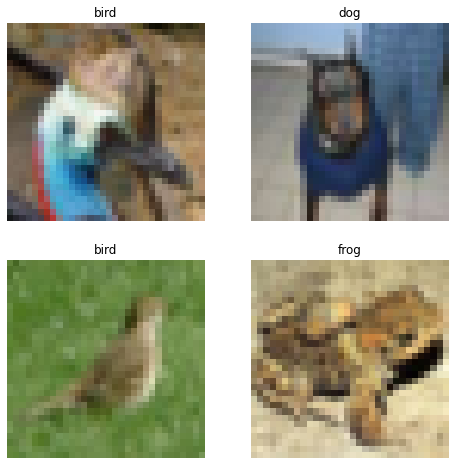

In [41]:
# Iterating and visualizing dataset
# label = training_data.classes
# labels_dict = {}
# for ind, label in enumerate(label_CIFAR100): 
#   labels_dict[ind] = label
labels_dict = {
    0:'airplane',
    1:'automobile',
    2:'bird',
    3:'cat', 
    4:'deer', 
    5:'dog', 
    6:'frog', 
    7:'horse', 
    8:'ship', 
    9:'truck'}

figure = plt.figure(figsize=(8,8))
cols, rows = 2,2

def show_img(fig_size=(8,8), no_cols=4, no_rows=4):
  figure = plt.figure(figsize=fig_size)
  cols, rows = no_cols, no_rows
  for i in range(1, cols*rows+1):
    sample_index = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_index]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_dict[label])
    plt.axis("off")
    #img = np.expand_dims(img.numpy(), axis=3)
    #img = img.squeeze().reshape(32,32,3)
    plt.imshow(img.permute(1, 2, 0), cmap="gray")
  plt.show()

# Call the function to show images
show_img()

In [34]:
# Creating custom dataset
class CustomImageDataset(Dataset):
  def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
    # to instantiate Dataset object
    self.img_labels = pd.read_csv(annotation_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self):
    # to return length of labels
    return len(self.img_labels)

  def __getitem__(self, ind):
    # load and return sample from dataset at the given index
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[ind, 0])
    img = read_image(img_path)
    label = self.img_labels.iloc[ind, 1]

    if self.transform:
      image = self.transform(image)
    if self.target_transform:
      label = self.target_transform(label)
    return image, label

In [36]:
# Preparing Data for training with DataLoaders
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


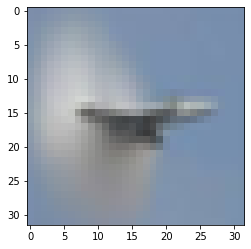

Label: airplane


In [48]:
# Iterate through DataLoader
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze().permute(1, 2, 0)
label = train_labels[0]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {labels_dict[int(label)]}")